# Asssignment 3

# Sentiment Analysis using different machine learning techniques



## Matshepo Lebese


## 219042116


## Source: https://www.crowdflower.com/data-for-everyone/


## Date: 13 September 2023

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Importing the libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('omw')
import nltk
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lebes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\lebes\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lebes\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Data Preparation

In [38]:
df = pd.read_csv('text_emotion.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [39]:
# Check for missing values
print(df.isnull().sum())


tweet_id     0
sentiment    0
author       0
content      0
dtype: int64


PRE PROCESS THE DATA FOR EDA

Text clean the content data to remove  URLs, hashtags, mentions, and special characters.

Lowercasing the text.

Tokenizing.

Removing stop words.Applying stemming or lemmatization.

In [40]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove stopwords and lemmatize
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

df['cleaned_content'] = df['content'].apply(clean_text)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Exploratory Data Analysis

 Head of the DataFrame: 

In [41]:
df.head()

,tweet_id,sentiment,author,content,cleaned_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one


Tail of the DataFrame: 

In [42]:
df.tail()

,tweet_id,sentiment,author,content,cleaned_content
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,happy mother day love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,happy mother day mommy woman man long momma so...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beautiful follow peep new hit single ww...
39999,1753919049,love,Alpharalpha,@mopedronin bullet train from tokyo the gf ...,bullet train tokyo gf visiting japan since thu...


Check the distribution of the sentiments to ensure that there isn't any extreme class imbalance. 

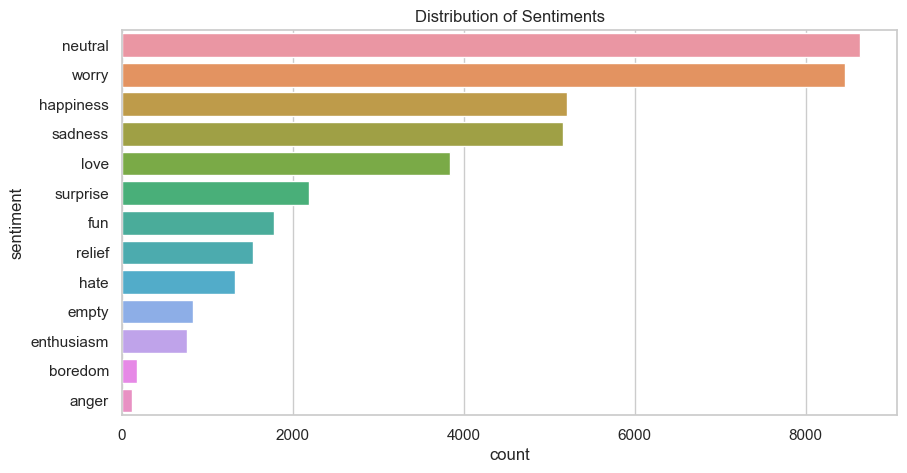

In [43]:
# Sentiment distribution

# Assuming your dataframe is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(y="sentiment", data=df, order = df['sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.show()


Understand the most common words or phrases in each sentiment category. Word clouds or bar plots can be effective visual tools for this.

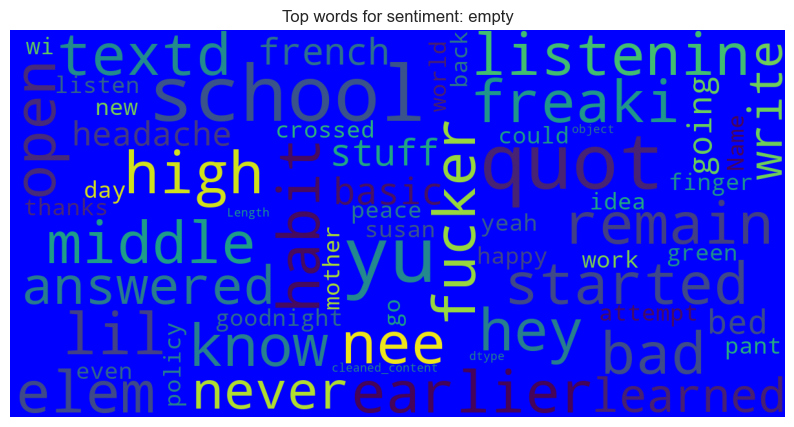

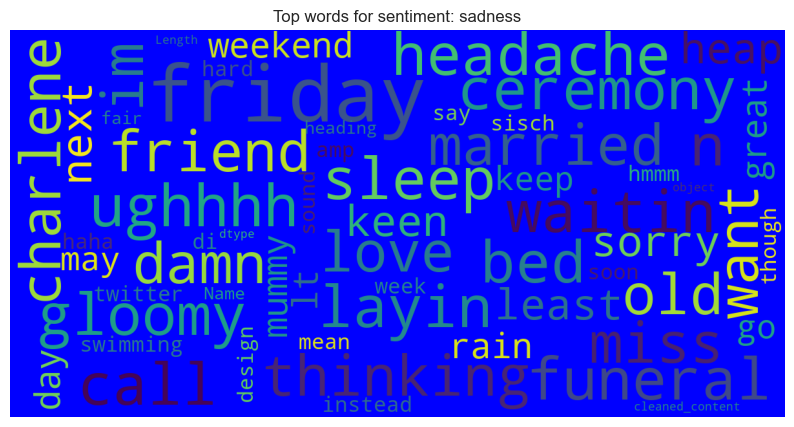

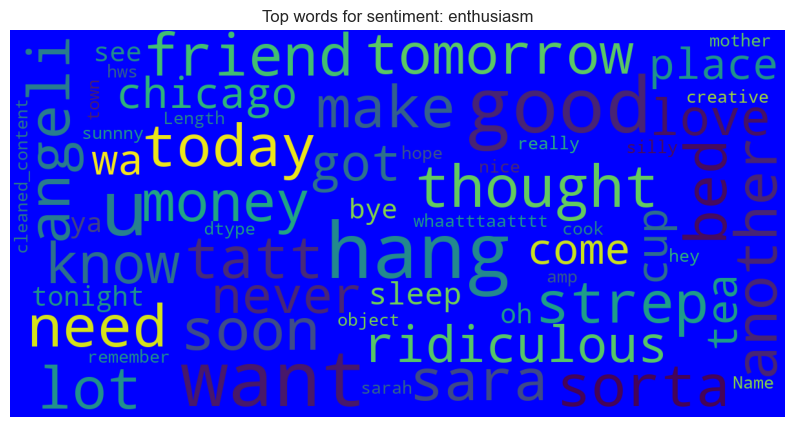

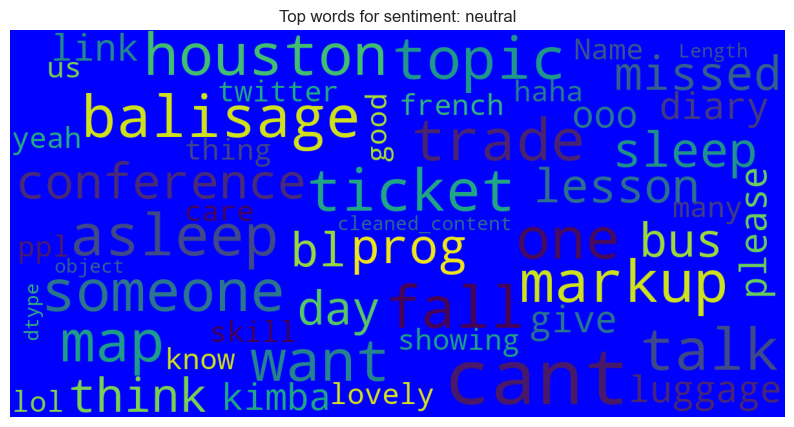

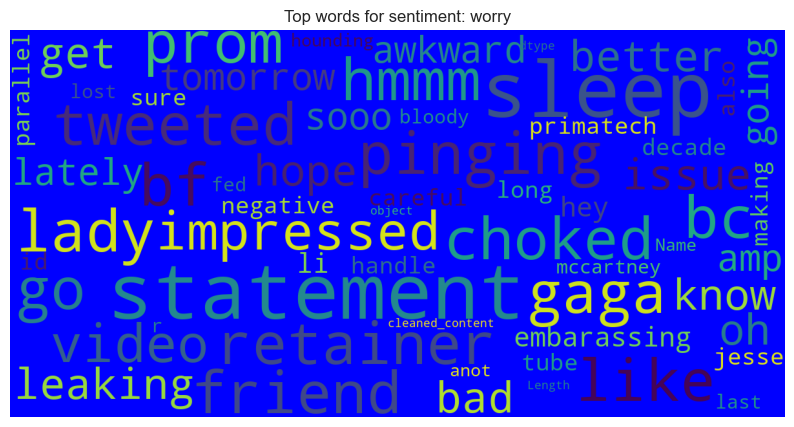

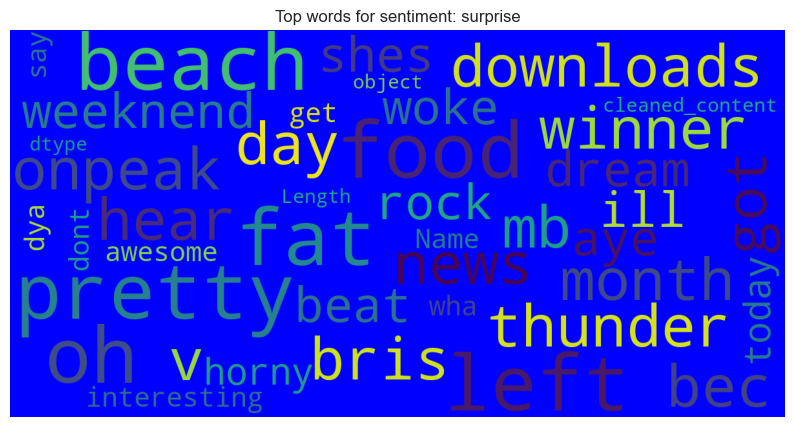

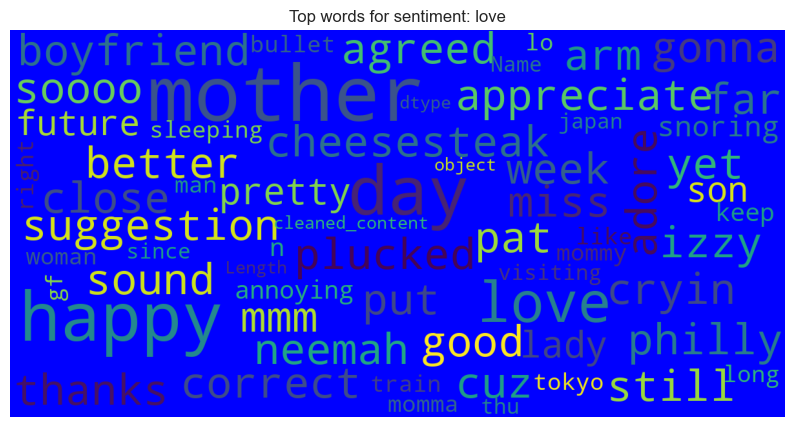

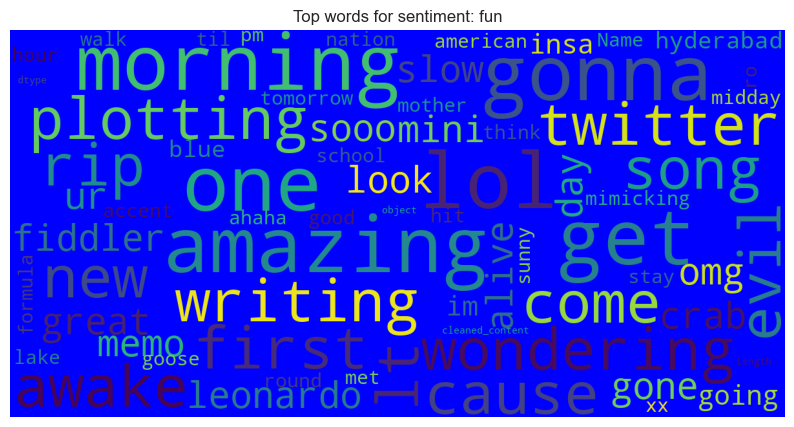

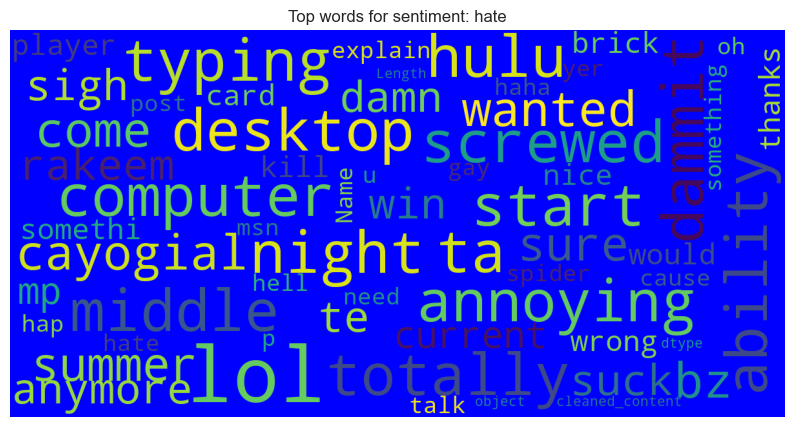

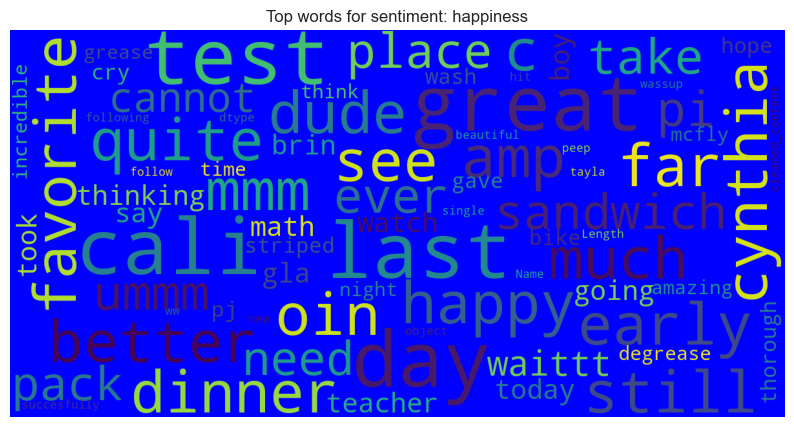

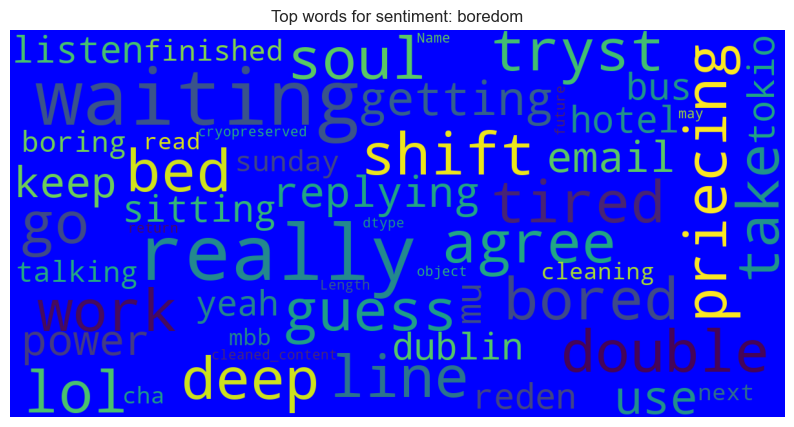

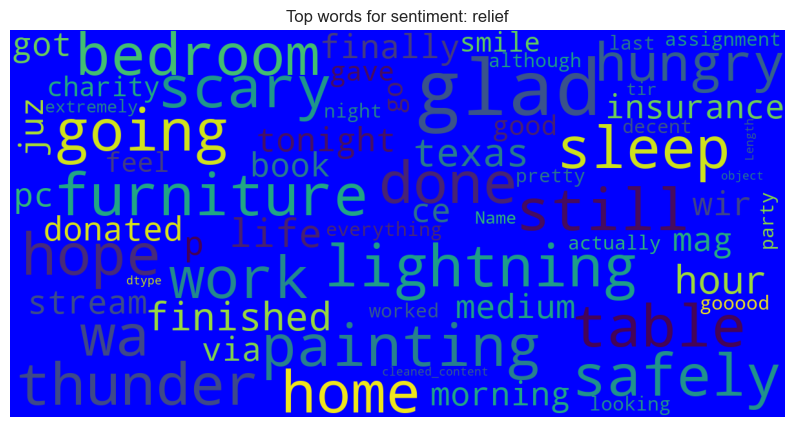

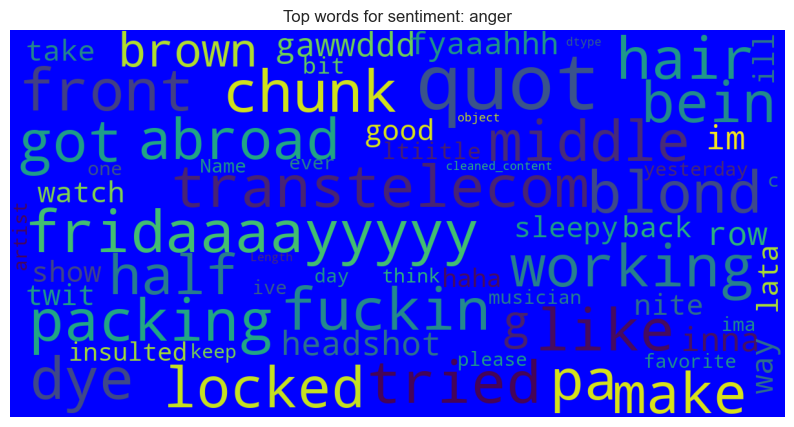

In [44]:
# Word distribution


stop = set(stopwords.words('english'))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Displaying top words for each sentiment
unique_sentiments = df['sentiment'].unique()
for sentiment in unique_sentiments:
    show_wordcloud(df[df['sentiment'] == sentiment]['cleaned_content'], title=f"Top words for sentiment: {sentiment}")

Check if certain authors contribute more data than others. Top 10 authors by the tweet count

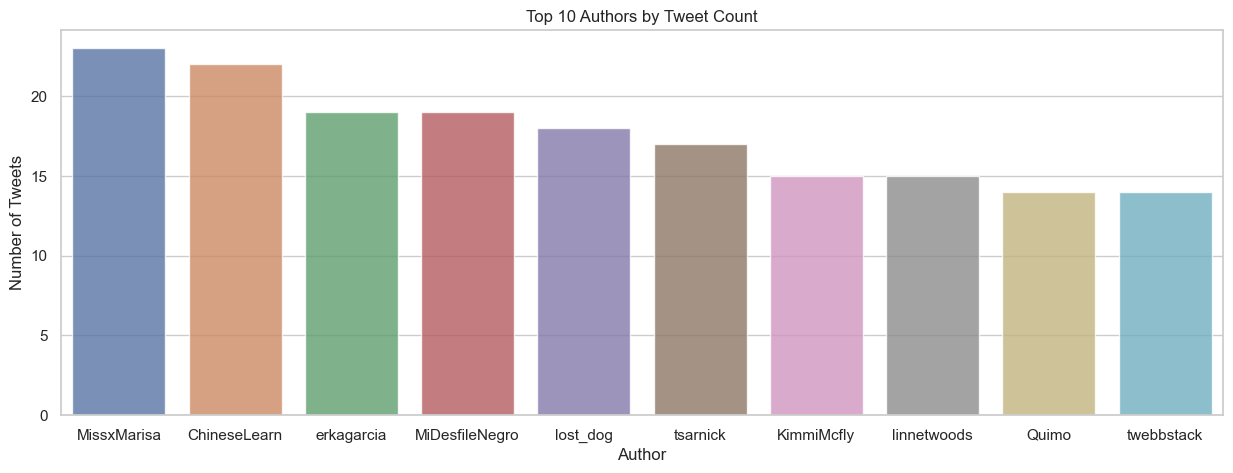

In [45]:
# Author distribution

top_authors = df['author'].value_counts().head(10)  # Adjust this to display the top N authors

plt.figure(figsize=(15,5))
sns.barplot(x=top_authors.index, y=top_authors.values, alpha=0.8)
plt.title('Top 10 Authors by Tweet Count')
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Author', fontsize=12)
plt.show()

Count the number of occurrences for each sentiment category.

In [46]:
# 1. Frequency Counts
sentiment_counts = df['sentiment'].value_counts()
print("Frequency Counts:\n", sentiment_counts)



Frequency Counts:
 neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


 Find the sentiment category that appears most frequently.

In [47]:
# 2. Mode
sentiment_mode = df['sentiment'].mode()
print("\nMode:\n", sentiment_mode)


Mode:
 0    neutral
Name: sentiment, dtype: object


Calculate the percentage of each sentiment category.

In [48]:
# 3. Percentage Distribution
sentiment_percentage = df['sentiment'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:\n", sentiment_percentage)



Percentage Distribution:
 neutral       21.5950
worry         21.1475
happiness     13.0225
sadness       12.9125
love           9.6050
surprise       5.4675
fun            4.4400
relief         3.8150
hate           3.3075
empty          2.0675
enthusiasm     1.8975
boredom        0.4475
anger          0.2750
Name: sentiment, dtype: float64


Examine the distribution of sentiments across another categorical variable, if you have one.

In [49]:
# 4. Cross-tabulations (Sentiment distribution by top 10 authors)
top_authors = df['author'].value_counts().head(10).index
cross_tab = pd.crosstab(df[df['author'].isin(top_authors)]['author'], df['sentiment'])
print("\nCross-tabulation (Sentiment by Author):\n", cross_tab)


Cross-tabulation (Sentiment by Author):
 sentiment       empty  enthusiasm  fun  happiness  hate  love  neutral  \
author                                                                   
ChineseLearn        1           2    2          5     0     2        9   
KimmiMcfly          1           0    2          4     0     0        5   
MiDesfileNegro      0           0    3          1     1     1        4   
MissxMarisa         0           0    1          4     1     3        6   
Quimo               0           0    0          5     0     2        3   
erkagarcia          0           0    4          0     0     4        2   
linnetwoods         0           0    0          2     0     2        2   
lost_dog            1           0    0          0     0     0        2   
tsarnick            0           0    1          5     0     2        3   
twebbstack          0           0    2          3     0     4        3   

sentiment       relief  sadness  surprise  worry  
author            

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Pre processing for Model Selection

In [50]:

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_content'])

In [51]:
# Define a mapping from sentiment labels to numbers
sentiment_mapping = {
    'anger': 0,
    'boredom': 1,
    'enthusiasm': 2,
    'empty': 3,
    'hate':4,
    'relief' : 5,
    'fun' : 6,
    'surprise': 7,
    'love' : 8,
    'sadness' : 9,
    'happiness' : 10,
    'worry': 11,
    'neutral': 12
    # Add more labels and corresponding values as needed
}

# Use the 'map' function to replace sentiment labels with numerical values
df['sentiment_encoded'] = df['sentiment'].map(sentiment_mapping)

In [52]:

y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Balancing the dataset

In [53]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [54]:
print(Counter(y_resampled))

Counter({0: 88, 1: 88, 2: 88, 3: 88, 4: 88, 5: 88, 6: 88, 7: 88, 8: 88, 9: 88, 10: 88, 11: 88, 12: 88})


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Model Comparison

LOGISTIC REGRESSION

In [55]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_resampled, y_resampled)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.09      0.01        22
           1       0.03      0.31      0.05        36
           2       0.03      0.10      0.04       152
           3       0.05      0.24      0.08       165
           4       0.13      0.29      0.18       265
           5       0.07      0.12      0.09       305
           6       0.12      0.23      0.16       355
           7       0.06      0.09      0.07       437
           8       0.38      0.38      0.38       768
           9       0.26      0.16      0.19      1033
          10       0.21      0.13      0.16      1042
          11       0.30      0.12      0.17      1692
          12       0.27      0.08      0.12      1728

    accuracy                           0.15      8000
   macro avg       0.15      0.18      0.13      8000
weighted avg       0.24      0.15      0.17      8000



DECISION TREE

In [56]:


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_resampled, y_resampled)

# Predictions
y_pred = dtree.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.09      0.01        22
           1       0.03      0.31      0.06        36
           2       0.03      0.09      0.04       152
           3       0.03      0.07      0.04       165
           4       0.11      0.26      0.15       265
           5       0.04      0.05      0.04       305
           6       0.09      0.17      0.12       355
           7       0.06      0.05      0.05       437
           8       0.36      0.33      0.34       768
           9       0.22      0.10      0.13      1033
          10       0.21      0.11      0.15      1042
          11       0.27      0.08      0.13      1692
          12       0.31      0.35      0.33      1728

    accuracy                           0.18      8000
   macro avg       0.14      0.16      0.12      8000
weighted avg       0.23      0.18      0.18      8000



RANDOM FOREST

In [57]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.05      0.00        22
           1       0.02      0.22      0.04        36
           2       0.02      0.06      0.03       152
           3       0.03      0.12      0.05       165
           4       0.11      0.28      0.16       265
           5       0.07      0.11      0.09       305
           6       0.11      0.18      0.14       355
           7       0.06      0.06      0.06       437
           8       0.37      0.40      0.38       768
           9       0.27      0.13      0.17      1033
          10       0.25      0.09      0.14      1042
          11       0.29      0.13      0.18      1692
          12       0.34      0.27      0.30      1728

    accuracy                           0.18      8000
   macro avg       0.15      0.16      0.13      8000
weighted avg       0.25      0.18      0.20      8000



In [58]:


# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(df['sentiment_encoded'].unique()), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_resampled.toarray(), y_resampled, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
36/36 [==============================] - 2s 32ms/step - loss: 2.5658 - accuracy: 0.0892 - val_loss: 2.5614 - val_accuracy: 0.1706
Epoch 2/10
36/36 [==============================] - 1s 23ms/step - loss: 2.5248 - accuracy: 0.2981 - val_loss: 2.5501 - val_accuracy: 0.1600
Epoch 3/10
36/36 [==============================] - 1s 29ms/step - loss: 2.4080 - accuracy: 0.4441 - val_loss: 2.5163 - val_accuracy: 0.1373
Epoch 4/10
36/36 [==============================] - 1s 26ms/step - loss: 2.0785 - accuracy: 0.6897 - val_loss: 2.4784 - val_accuracy: 0.1423
Epoch 5/10
36/36 [==============================] - 1s 26ms/step - loss: 1.5217 - accuracy: 0.8112 - val_loss: 2.5040 - val_accuracy: 0.1437
Epoch 6/10
36/36 [==============================] - 1s 34ms/step - loss: 0.9433 - accuracy: 0.8802 - val_loss: 2.6259 - val_accuracy: 0.1484
Epoch 7/10
36/36 [==============================] - 1s 29ms/step - loss: 0.5611 - accuracy: 0.9152 - val_loss: 2.7221 - val_accuracy: 0.1472
Epoch 8/10
36

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Final Model Selection

 Random Forest is the best performing model among the ones I tested.

In [59]:
# fine tuning random forest


# Define the model
rf = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


Retrain model using output parameters

In [32]:
# Define the model
rf = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Create Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [61]:


# Define the optimized hyperparameters
optimal_params = {
    'n_estimators': 100,          # The number of trees in the forest
    'max_depth': None,              # The maximum depth of the tree
    'min_samples_split': 10,       # The minimum number of samples required to split an internal node
    'min_samples_leaf': 2,        # The minimum number of samples required to be at a leaf node
    'max_features': 'sqrt',       # The number of features to consider when looking for the best split
    'bootstrap': True             # Whether bootstrap samples are used when building trees
}

# Create the RandomForest classifier with the optimized hyperparameters
clf = RandomForestClassifier(**optimal_params, random_state=42)

# Fit the model to your data
clf.fit(X_train, y_train)

# You can now evaluate the model on validation/test data or make predictions
y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       1.00      0.00      0.00        36
           2       0.00      0.00      0.00       152
           3       0.00      0.00      0.00       165
           4       0.38      0.17      0.23       265
           5       0.35      0.04      0.08       305
           6       0.20      0.01      0.02       355
           7       0.31      0.03      0.06       437
           8       0.47      0.42      0.44       768
           9       0.34      0.20      0.25      1033
          10       0.32      0.43      0.36      1042
          11       0.33      0.49      0.39      1692
          12       0.35      0.52      0.42      1728

    accuracy                           0.35      8000
   macro avg       0.39      0.18      0.17      8000
weighted avg       0.33      0.35      0.31      8000



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Reflections

## Decision-making process:

•Data Preprocessing: I used preprocessing techniques like converting text to lowercase, removing mentions, URLs, punctuations, and numbers. You also lemmatized the words and removed stopwords. This is a standard practice in NLP to get rid of unnecessary noise and make the data more meaningful for analysis.

•Visualization: I used bar charts, word clouds, and other visualizations to understand sentiment distribution, word distributions, and top authors. Visualizing the data helped in understanding the skewness of the sentiments and the frequently used words for each sentiment.

•TF-IDF Vectorization: I chose to convert the text data into numerical format using TF-IDF. This approach gives more importance to words that are less frequent across documents, making it a good choice for sentiment analysis.

•Balancing the Data: I noticed that some sentiment classes had many fewer samples than others. By applying the RandomUnderSampler, I balanced the dataset. While this does make the classes even, it also discards a lot of data.

•Model Training: I trained four models: a logistic regression, random forest and a decision tree. This allowed me to compare and evaluate their performances.
    
## What I learned from the data and insights:

•A significant challenge seems to be class imbalance. Some classes have very low or zero precision, recall, and F1-score. This often leads to models that are biased towards dominant classes.

•The dataset had uneven sentiment distributions with sentiments like 'neutral' and 'worry' dominating, while 'anger' had the least representation.

•Common words in tweets differ by sentiment, which is essential for model learning.

•The top authors by tweet count might be prolific tweeters, but their sentiment distribution doesn't necessarily mirror the 
dataset's overall sentiment distribution.

•Logistic Regression: 15% accuracy on the test set.

•Decision Tree: 18% accuracy on the test set.

•Random Forest: 18% accuracy on the test set.

• Neural Network (Deep Learning with TensorFlow): 13.79% accuracy on the test set.

• Sentiment analysis, especially with multiple classes, can be challenging. Subtle nuances in language and context can make certain sentiments hard to classify.

## What I would do differently next time:

• Data Preprocessing: I need to also consider stemming as an alternative to lemmatization, which might work better for certain types of text.

• Balancing the Data: Instead of undersampling, I will consider other techniques like oversampling, SMOTE, or using model techniques that handle imbalanced data better. Undersampling might lead to loss of valuable information.

• Feature Engineering: Using only TF-IDF might limit the information captured. Next time, I will consider adding other features, like word embeddings (Word2Vec, GloVe, etc.), sentiment intensity, or custom features like the count of exclamation marks, emojis, etc.

• Model Exploration: In the future, I will explore other models like SVM, Gradient Boosting, or deep learning approaches like LSTMs.



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)